In [1]:
%matplotlib notebook
import pandas as pd
import lightkurve as lk
from del_scu_search import *
import matplotlib.pyplot as plt
from ptv_search import *

294327312
LightCurveFileCollection of 4 objects:
TessLightCurveFile(TICID: 294327312) 
TessLightCurveFile(TICID: 294327312) 
TessLightCurveFile(TICID: 294327312) 
TessLightCurveFile(TICID: 294327312) 

25.947723890672933
26.296354302545524
21.77256379226219
24.454384676373138


<IPython.core.display.Javascript object>


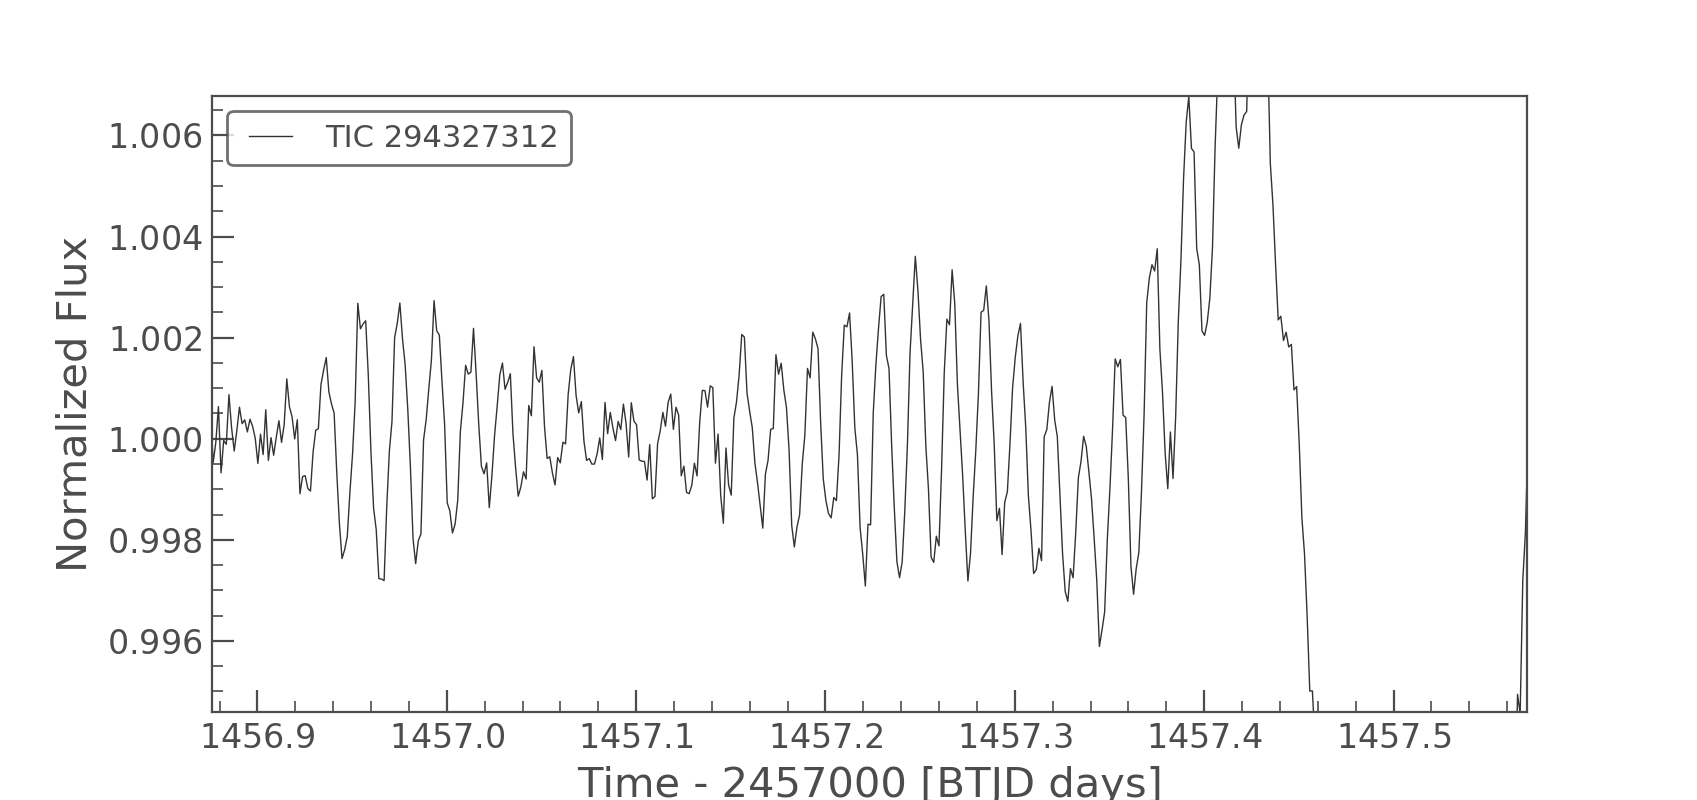

In [7]:
%matplotlib notebook
astars = pd.read_csv('tessAstars.csv')
star  = astars['ID'][0]

ticid = '294327312'
print(ticid)
lcs = lk.search_lightcurvefile(ticid).download_all()
lc = None
print(lcs)
#concatenate the available TESS sectors crudely
for lcfile in lcs:
    if lc is None:
        print(lcfile.time[-1]-lcfile.time[0])
        lc = lcfile.PDCSAP_FLUX.normalize().flatten(window_length=201,break_tolerance=10)
    else:
        print(lcfile.time[-1]-lcfile.time[0])
        lc = lc.append(lcfile.PDCSAP_FLUX.normalize().flatten(window_length=201,break_tolerance=10))

lc = lc.remove_nans()
lc.plot()

[array([5.24134121e-04, 1.57240236e-03, 2.62067060e-03, ...,
       1.50346353e+03, 1.50346457e+03, 1.50346562e+03]), array([5.14197752e-07, 5.09989618e-07, 4.97303258e-07, ...,
       1.91018855e-05, 5.76246635e-06, 1.07773326e-05]), array([  37321,  649522,  724165, 1336363, 1336373, 1411006, 1411016])]
39.12137076467573


<IPython.core.display.Javascript object>


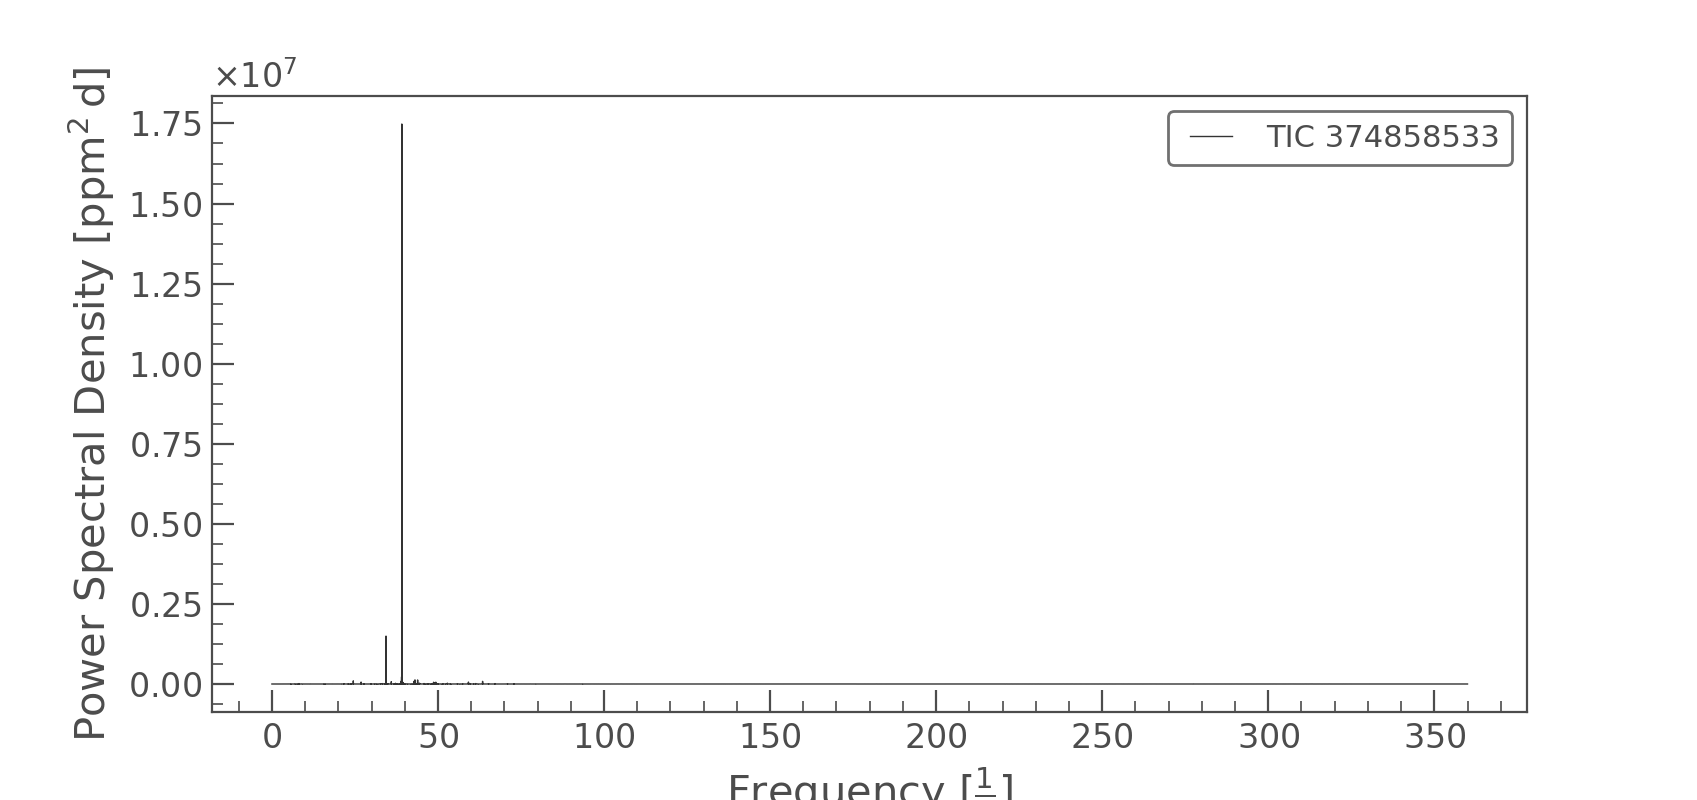

In [3]:
del_scu = is_delta_scuti(lc)
if del_scu is not False:
    print(del_scu)
    pg = lc.to_periodogram()
    freqs = [pg.frequency_at_max_power.value]
    print(pg.frequency_at_max_power.value)
    pg.plot()

<IPython.core.display.Javascript object>


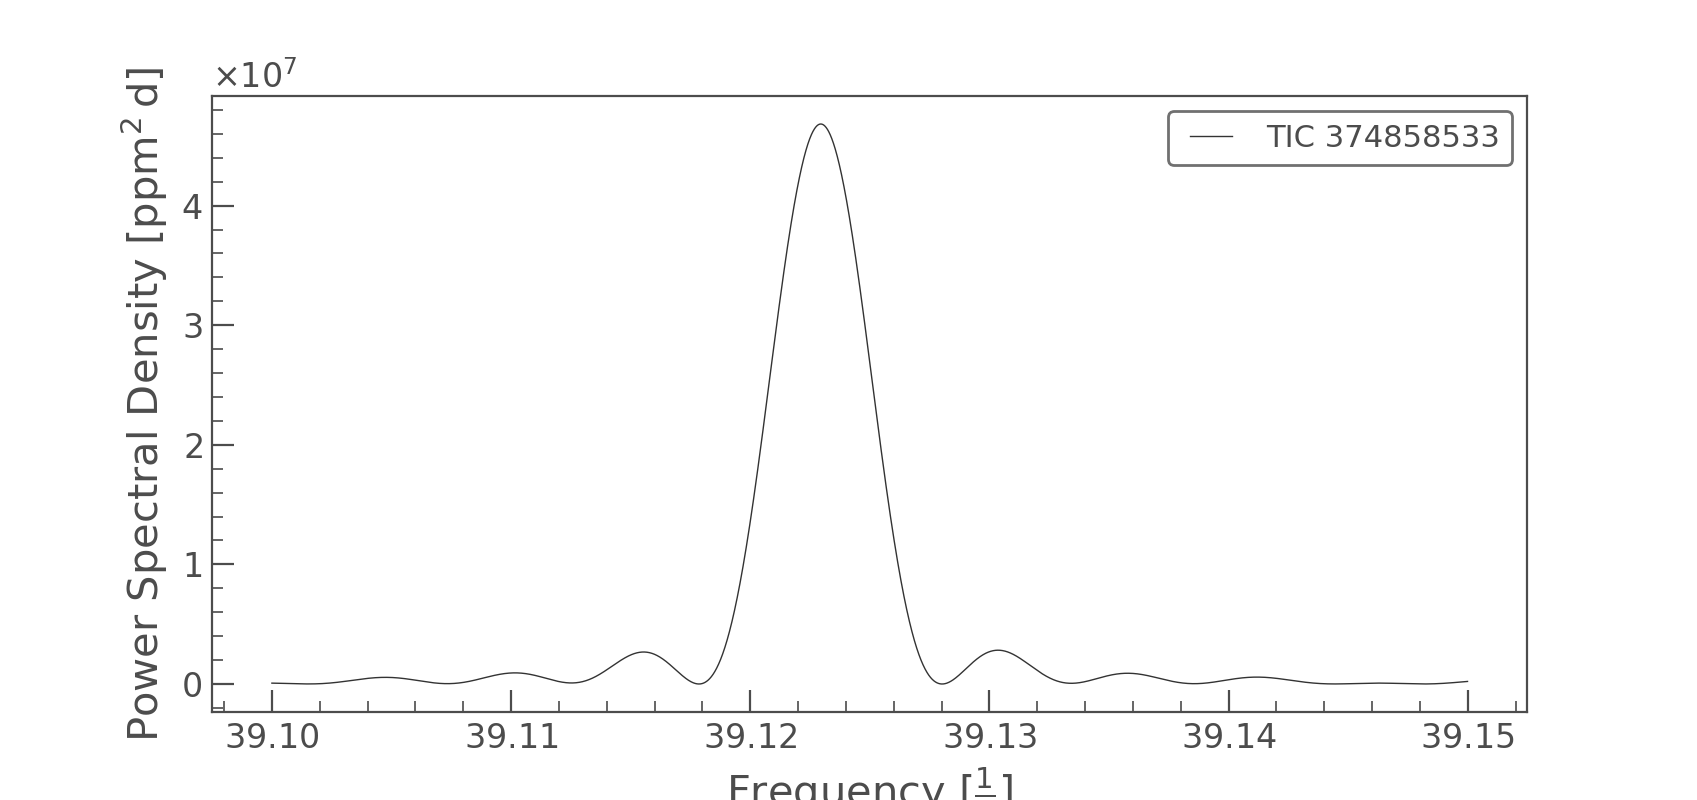

39.12294659180156


In [4]:
pg = lc.remove_nans().to_periodogram(min_frequency = 39.100, max_frequency = 39.150, oversample_factor = 500, nyquist_factor = 4)
pg.plot()
print(pg.frequency_at_max_power.value)

In [ ]:
time = lc.time
flux =lc.flux


1325.3701131688592


<IPython.core.display.Javascript object>


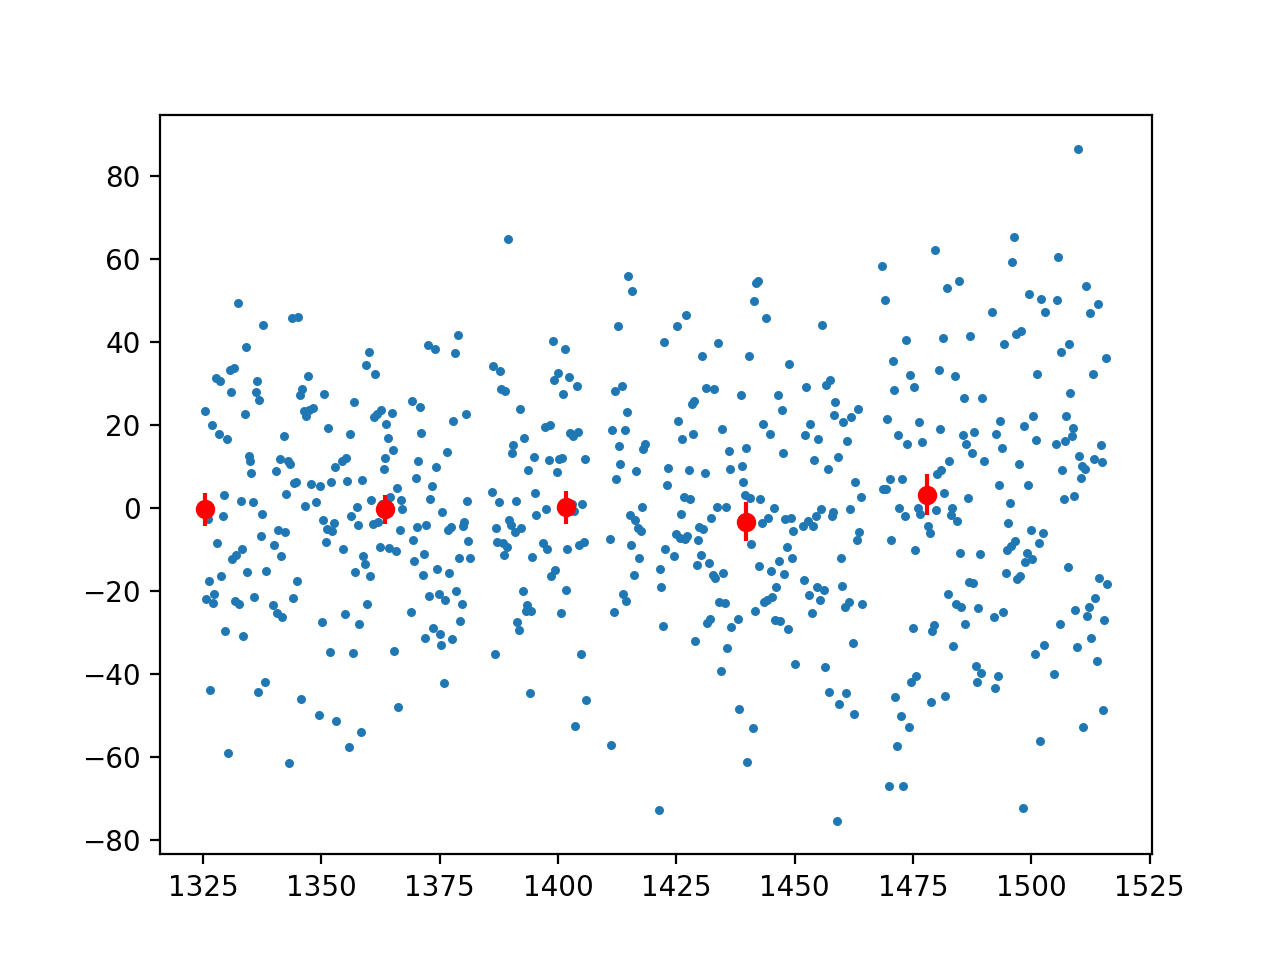

In [6]:
guess_phase = lc.time[np.abs(lc.flux[0:100]).argmin()]
print(guess_phase-0.01)
periodlist,mediantimelist = find_phase_OC(lc=lc,frequency_peaks=[39.12294659180156],guess_phase=guess_phase-0.1)
plot_LAT('o-c plots/'+str(ticid)+'_o_c.png', mediantimelist, periodlist)